In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('16.csv')
df.shape

(10963, 2)

In [3]:
df.head()

,Time,domain
0,2022-01-17 00:37:51,www.amazon.in
1,2022-01-17 00:38:10,music.amazon.in
2,2022-01-17 00:39:01,www.google.com
3,2022-01-17 00:39:22,www.google.com
4,2022-01-17 00:39:23,www.google.com


In [4]:
df.tail()

,Time,domain
10958,2022-04-16 22:56:49,docs.google.com
10959,2022-04-16 22:58:24,localhost:8888
10960,2022-04-16 23:06:25,www.amazon.in
10961,2022-04-16 23:09:25,localhost:8888
10962,2022-04-16 23:09:50,www.google.com


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-01-17 00:37:51,www.amazon.in
1,2022-01-17 00:38:10,music.amazon.in
2,2022-01-17 00:39:01,www.google.com
3,2022-01-17 00:39:22,www.google.com
4,2022-01-17 00:39:23,www.google.com


In [14]:
df['domain'].value_counts()[:60]

www.google.com                   3266
webauth.umbc.edu                 1351
my3.my.umbc.edu                   482
blackboard.umbc.edu               421
my.umbc.edu                       379
github.com                        338
deepnote.com                      285
stackoverflow.com                 185
umbc-csm.symplicity.com           141
mail.google.com                   133
csprd-web.ps.umbc.edu             120
docs.google.com                   117
localhost:8888                    115
www.netflix.com                   106
myretrievercare.umbc.edu           97
www.youtube.com                    97
umbc-residence.symplicity.com      94
www.apartments.com                 76
www.primevideo.com                 69
www.linkedin.com                   66
getsupport.apple.com               59
archive.ics.uci.edu                55
thefriends.online                  47
umbc.webex.com                     47
www.amazon.com                     47
www.rakuten.com                    45
www.redfin.c

<AxesSubplot:>

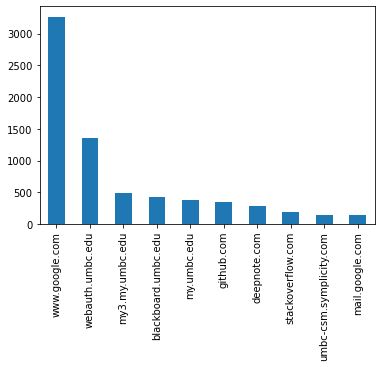

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     783
1     249
2     204
3      57
4      38
5      25
6       7
7      69
8      45
9      92
10    266
11    642
12    728
13    988
14    660
15    571
16    978
17    607
18    632
19    682
20    594
21    600
22    733
23    713
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

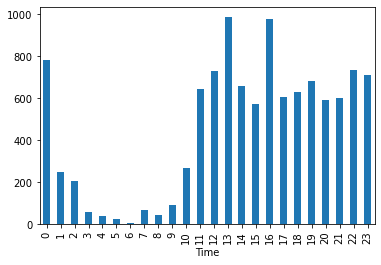

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-17 00:37:51,www.amazon.in,Monday,0
1,2022-01-17 00:38:10,music.amazon.in,Monday,0
2,2022-01-17 00:39:01,www.google.com,Monday,0
3,2022-01-17 00:39:22,www.google.com,Monday,0
4,2022-01-17 00:39:23,www.google.com,Monday,0


In [19]:
df['Day'].value_counts()

Wednesday    2141
Thursday     2117
Tuesday      1719
Friday       1507
Monday       1441
Saturday     1058
Sunday        980
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1441
1    1719
2    2141
3    2117
4    1507
5    1058
6     980
Name: DayIndex, dtype: int64

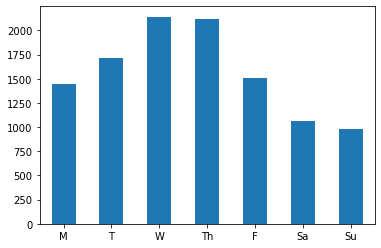

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-17 00:37:51,www.amazon.in,Monday,0,False
1,2022-01-17 00:38:10,music.amazon.in,Monday,0,False
2,2022-01-17 00:39:01,www.google.com,Monday,0,False
3,2022-01-17 00:39:22,www.google.com,Monday,0,False
4,2022-01-17 00:39:23,www.google.com,Monday,0,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
225,2022-01-22 01:40:02,cgifederal.secure.force.com,Saturday,5,True
226,2022-01-22 01:41:15,cgifederal.secure.force.com,Saturday,5,True
227,2022-01-22 01:41:38,www.google.com,Saturday,5,True
228,2022-01-22 01:41:42,cdn.ustraveldocs.com,Saturday,5,True
229,2022-01-22 01:48:20,www.google.com,Saturday,5,True


In [25]:
weekday['domain'].value_counts()[:5]

www.google.com         2781
webauth.umbc.edu       1068
my3.my.umbc.edu         424
my.umbc.edu             328
blackboard.umbc.edu     300
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

www.google.com             485
webauth.umbc.edu           283
blackboard.umbc.edu        121
umbc-csm.symplicity.com     84
github.com                  77
Name: domain, dtype: int64

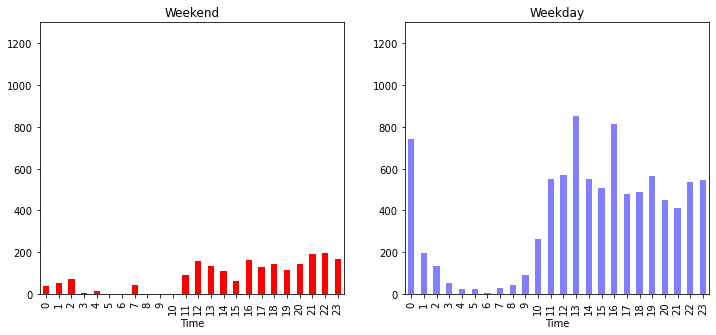

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

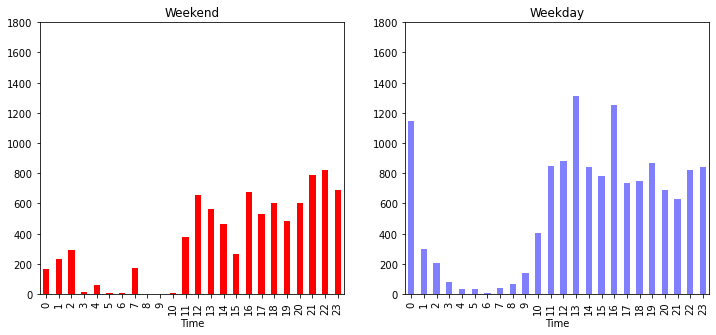

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:10]

www.google.com             3266
webauth.umbc.edu           1351
my3.my.umbc.edu             482
blackboard.umbc.edu         421
my.umbc.edu                 379
github.com                  338
deepnote.com                285
stackoverflow.com           185
umbc-csm.symplicity.com     141
mail.google.com             133
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

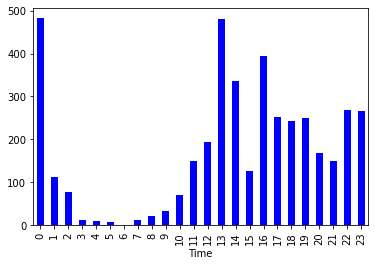

In [33]:
_= show_domain_stats('google', 'blue')

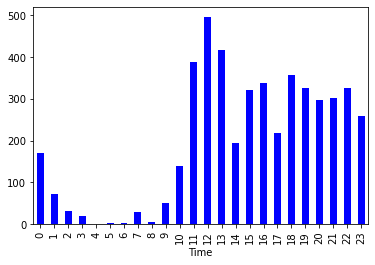

In [34]:
_= show_domain_stats('github|colab|umbc', 'blue')

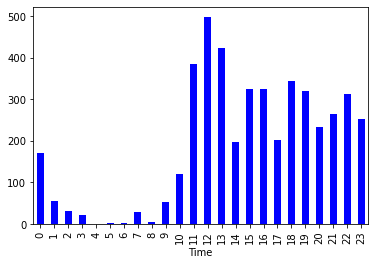

In [35]:
_= show_domain_stats('puma|under|umbc', 'blue')

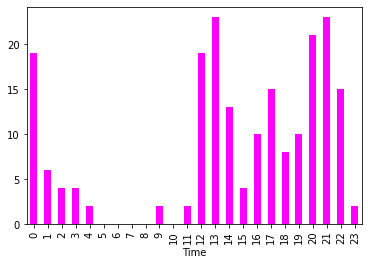

In [36]:
_ = show_domain_stats('youtube', 'magenta')


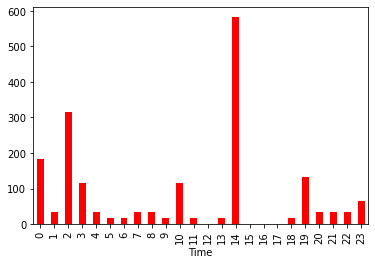

In [37]:
_ = show_domain_stats('apple', 'red')

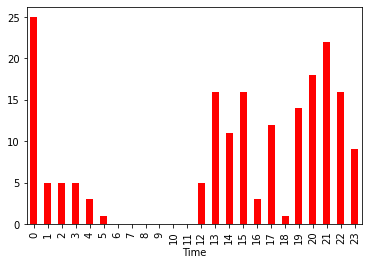

In [38]:
_ = show_domain_stats('netflix', 'red')

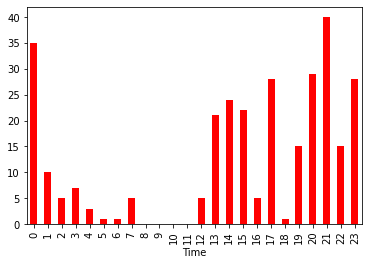

In [39]:
_ = show_domain_stats('netflix|disney|prime', 'red')

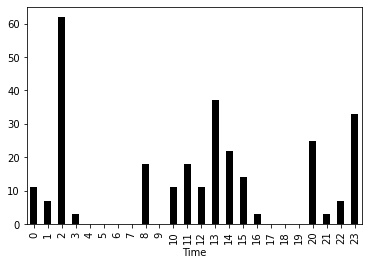

In [40]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. This is Personal Computer
2. he/she is not employed 
3. Mostly he/she shows intrests on github,UMBC, Blackboard, Netflix and prime.
4. he/she showing a intrest in  movies and webseries & looking for Appartment, other than than mostly prefered to work or study and spends more time at computer & looking for free lancing or parttime 